In [ ]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    confusion_matrix,
    make_scorer,
    precision_score,
    recall_score,
    RocCurveDisplay,
    roc_auc_score,
    r2_score
)

import joblib


In [ ]:
df_all = pd.read_csv('clean_data1.csv')
df_all['age'] = df_all['age'].str.replace('[','(',regex=False)
df_all

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,(70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [ ]:
# load functions to the notebook 


In [ ]:
cols = ['medical_specialty','diag_1','diag_2','diag_3']
for i in cols:
    print(i)
    print(df_all[i].unique())

medical_specialty
['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']


In [ ]:
#Replacing Other diagnoses with secondary and/or tertiary diagnosis. 

df_all['diag_1'] = np.where(df_all['diag_1'] == 'Other', 
                            np.where(df_all['diag_2'] == 'Other',
                                     df_all['diag_3'],
                                     df_all['diag_2']
                                    ), 
                            df_all['diag_1'])
df_all['diag_1'].value_counts(normalize=True)

diag_1
Circulatory        0.39128
Respiratory        0.17760
Diabetes           0.12628
Digestive          0.10988
Injury             0.07576
Other              0.06272
Musculoskeletal    0.05600
Missing            0.00048
Name: proportion, dtype: float64

In [ ]:
textCols = ['glucose_test','A1Ctest','change','diabetes_med','readmitted']
for i in textCols:
    print(i)
    print(df_all[i].unique())

glucose_test
['no' 'normal' 'high']
A1Ctest
['no' 'normal' 'high']
change
['no' 'yes']
diabetes_med
['yes' 'no']
readmitted
['no' 'yes']


In [ ]:
binaryCols = ['change','diabetes_med','readmitted']
for i in binaryCols:
    df_all[i] = df_all[i].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
noNormalHighCols = ['glucose_test','A1Ctest']
le = LabelEncoder()
for i in noNormalHighCols:
    #df_all[i] = le.fit_transform(df_all[i])
    df_all[i+'_ind'] = df_all[i].apply(lambda x: 0 if x == 'no' else 1 if x == 'normal' else 2)

df_all['age_t'] = le.fit_transform(df_all['age'])

In [ ]:
df_all

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0,0,0,3
1,(70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0,0,0,3
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1,0,0,1
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1,0,0,3
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Circulatory,Circulatory,Respiratory,no,no,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1,0,1,4
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1,0,2,4
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1,1,0,3
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0,0,0,3


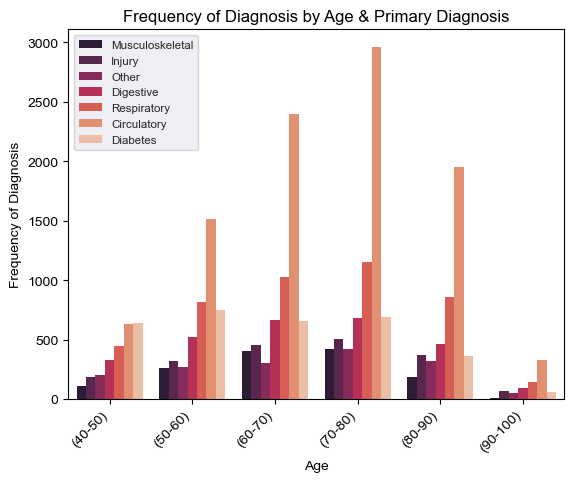

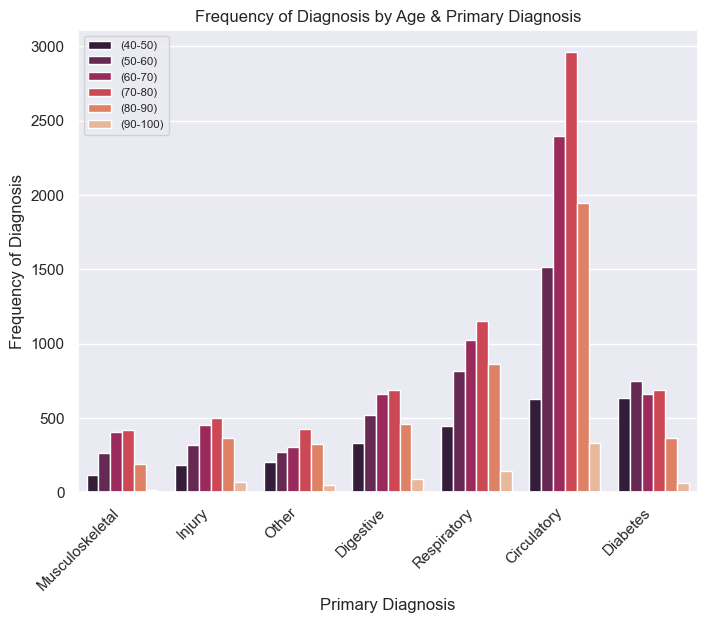

In [ ]:
# most common primary diagnosis by age group?
groupings = [['age',True,'Age','Primary Diagnosis'],
             ['diag_2',False,'Primary Diagnosis','Age']]

for i in groupings:
    df_chart = df_all.groupby(['age','diag_1']).agg({'diag_2':'count'}).reset_index().sort_values(i[0],ascending=i[1])
    df_chart = df_chart.rename(columns={'age': 'Age',
                                        'diag_1':'Primary Diagnosis',
                                        'diag_2':'Frequency'}).sort_values(by=['Age','Frequency'])
    df_chart = df_chart[df_chart['Primary Diagnosis'] != 'Missing']

    chart = sns.barplot(data=df_chart,x=i[2],y="Frequency",hue=i[3],palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper left',fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Frequency of Diagnosis')
    plt.title("Frequency of Diagnosis by Age & Primary Diagnosis")
    plt.show()


In [ ]:
#Add diabetes indicator (if any of diagnoses are diabetes 1, else 0)
diagCols = ['diag_1','diag_2','diag_3']
diag = 'Diabetes'

df_all['Diabetes_ind'] = (df_all['diag_1'].str.contains(diag) | df_all['diag_2'].str.contains(diag) | df_all['diag_3'].str.contains(diag)) * 1

In [ ]:
df_all[df_all['Diabetes_ind'] == 1].head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t,Diabetes_ind
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,no,no,1,1,1,0,0,3,1
12,(70-80),8,67,0,21,0,0,0,Other,Diabetes,...,Other,no,normal,0,1,0,0,1,3,1
14,(80-90),2,73,1,26,0,0,0,InternalMedicine,Circulatory,...,Diabetes,no,no,0,1,0,0,0,4,1
16,(70-80),3,52,0,10,0,0,0,Other,Circulatory,...,Diabetes,no,no,0,1,1,0,0,3,1
18,(40-50),7,72,0,13,0,0,0,InternalMedicine,Diabetes,...,Other,no,high,0,1,1,0,2,0,1


In [ ]:
df_all['readmitted'].value_counts(normalize=True)

readmitted
0    0.52984
1    0.47016
Name: proportion, dtype: float64

In [ ]:
df_all[['Diabetes_ind','readmitted']].value_counts(normalize=True)

Diabetes_ind  readmitted
0             0             0.34188
              1             0.30660
1             0             0.18796
              1             0.16356
Name: proportion, dtype: float64

In [ ]:
print(df_all[['Diabetes_ind']].value_counts(normalize=False))
print(df_all[['Diabetes_ind']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print('')

print(df_all[['Diabetes_ind','readmitted']].value_counts(normalize=False))
print(df_all[['Diabetes_ind','readmitted']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Diabetes_ind
0               16212
1                8788
Name: count, dtype: int64
Diabetes_ind
0               64.8%
1               35.2%
Name: proportion, dtype: object

Diabetes_ind  readmitted
0             0             8547
              1             7665
1             0             4699
              1             4089
Name: count, dtype: int64
Diabetes_ind  readmitted
0             0             34.2%
              1             30.7%
1             0             18.8%
              1             16.4%
Name: proportion, dtype: object


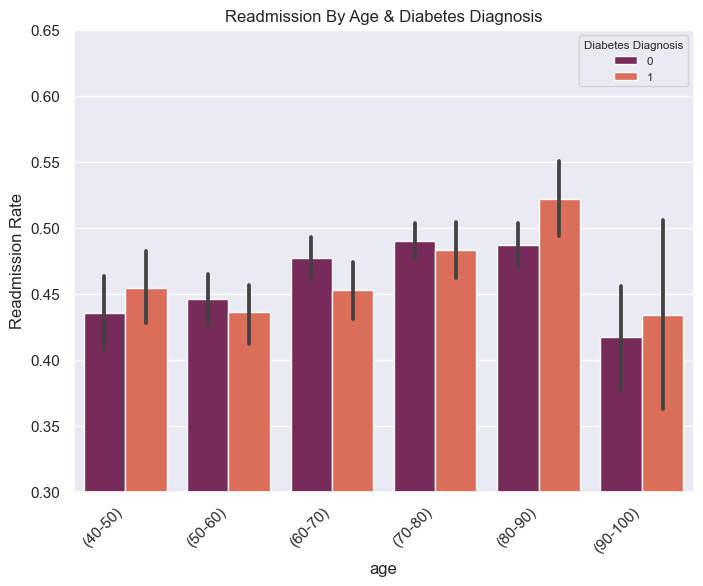

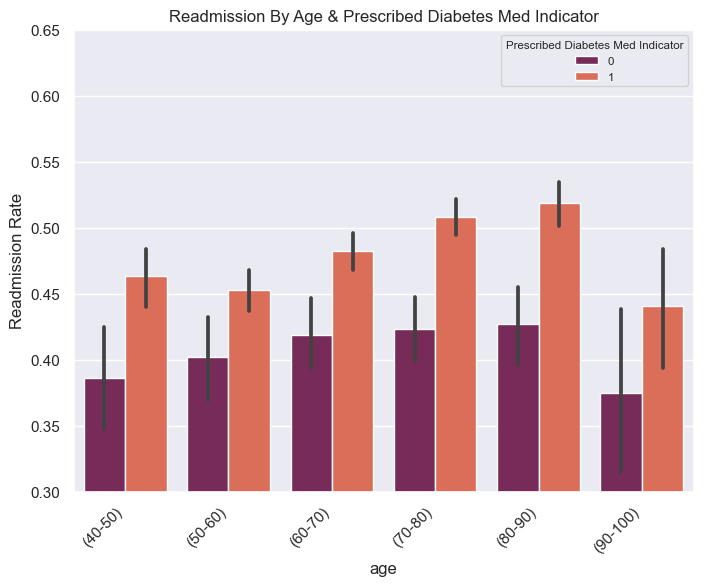

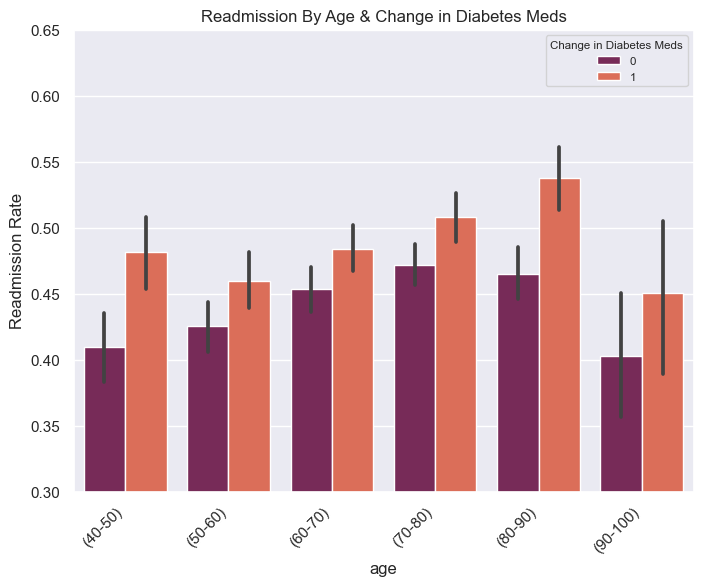

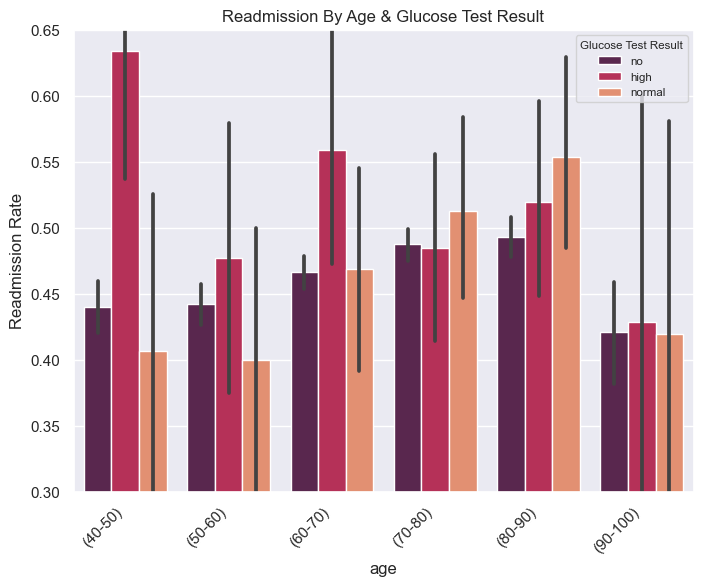

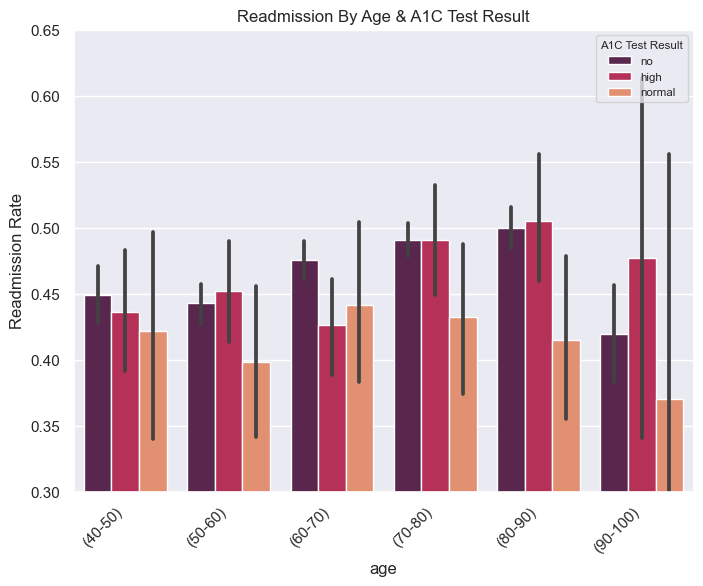

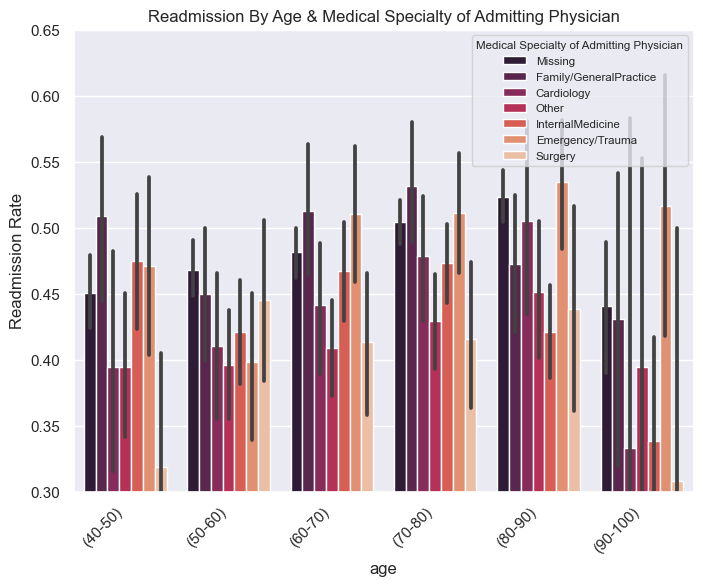

In [ ]:
cols = {'Diabetes_ind':'Diabetes Diagnosis',
        'diabetes_med':'Prescribed Diabetes Med Indicator',
        'change':'Change in Diabetes Meds', 
        'glucose_test':'Glucose Test Result',
        'A1Ctest':'A1C Test Result',
        'medical_specialty':'Medical Specialty of Admitting Physician'
        }
df_chart = df_all.sort_values('age')

for i in cols.keys():
    chart = sns.barplot(data=df_chart,x='age',y="readmitted",hue=i,palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set(ylim=(0.3, 0.65))
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper right',title=cols[i],fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Readmission Rate')
    plt.title("Readmission By Age & "+cols[i])
    plt.show()

In [ ]:
#n_lab_procedures bucketing
visits = pd.qcut(df_all['n_lab_procedures'],[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                      labels=['1st Decile', '2nd Decile','3rd Decile','4th Decile',
                              '5th Decile','6th Decile','7th Decile','8th Decile',
                              '9th Decile','10th Decile'])
df_all['n_lab_procedures_bucket'] = visits

#n_medications bucketing
medications = pd.qcut(df_all['n_medications'],[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                      labels=['Low', 'Low Moderate','Moderate', 
                              'High', 'Very High'])
df_all['n_medications_bucket'] = medications

#n_outpatient bucketing
visits = pd.cut(df_all['n_outpatient'],bins = [-0.001, 0, 1, 10, 25],
                      labels=['None', 'One','Up to 10', 
                              'Up to 25'])
df_all['n_outpatient_bucket'] = visits

#n_emergency bucketing
visits = pd.cut(df_all['n_emergency'],bins = [-0.001, 0, 1, 10, 100],
                      labels=['None', 'One','Up to 10', 
                              '>10'])
df_all['n_emergency_bucket'] = visits

#n_inpatient bucketing
visits = pd.cut(df_all['n_inpatient'],bins = [-0.001, 0, 1, 5, 10, 15],
                      labels=['None', 'One','Up to 5','Up to 10', 
                              '>10'])
df_all['n_inpatient_bucket'] = visits

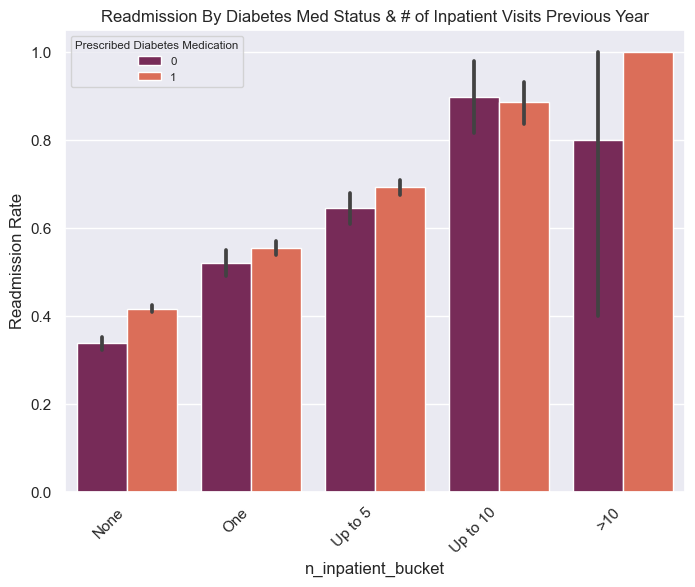

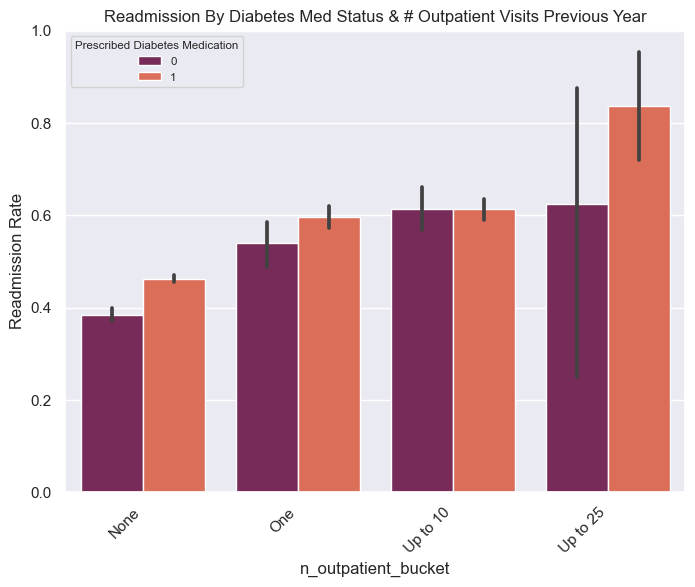

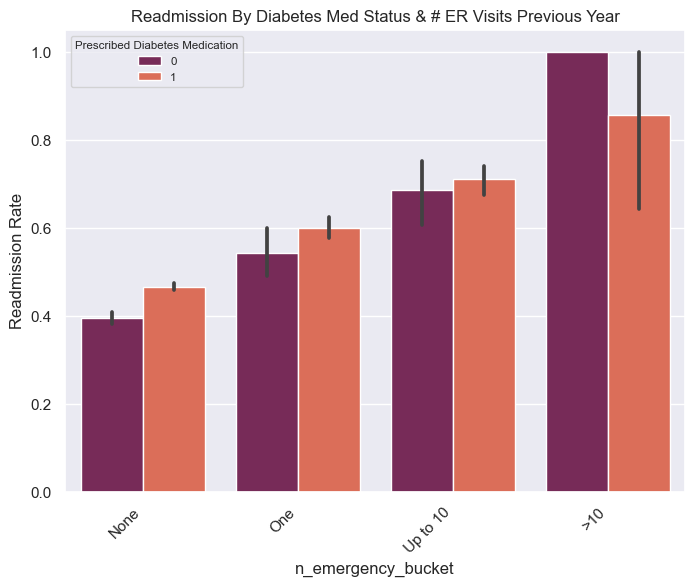

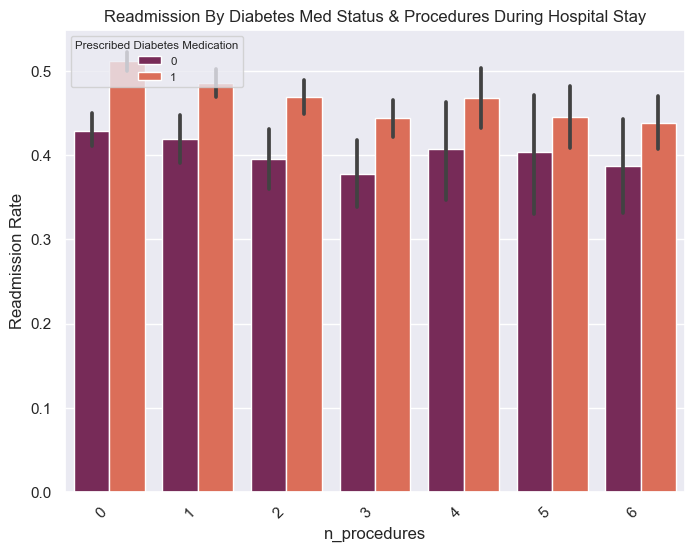

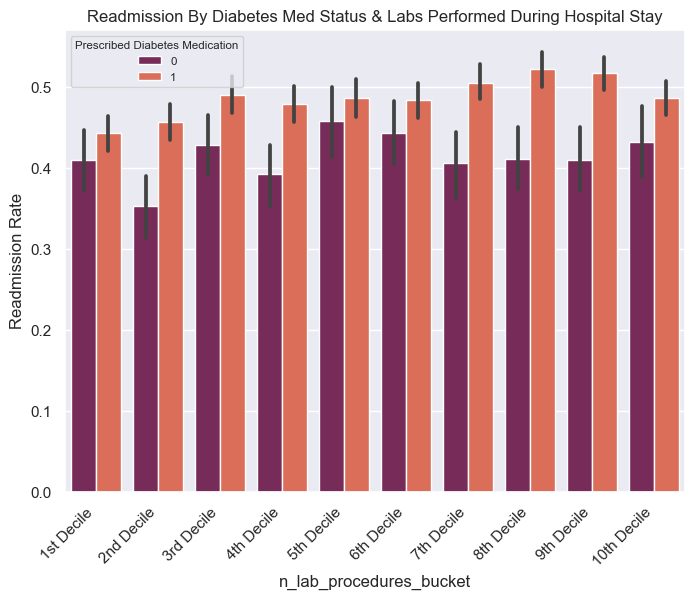

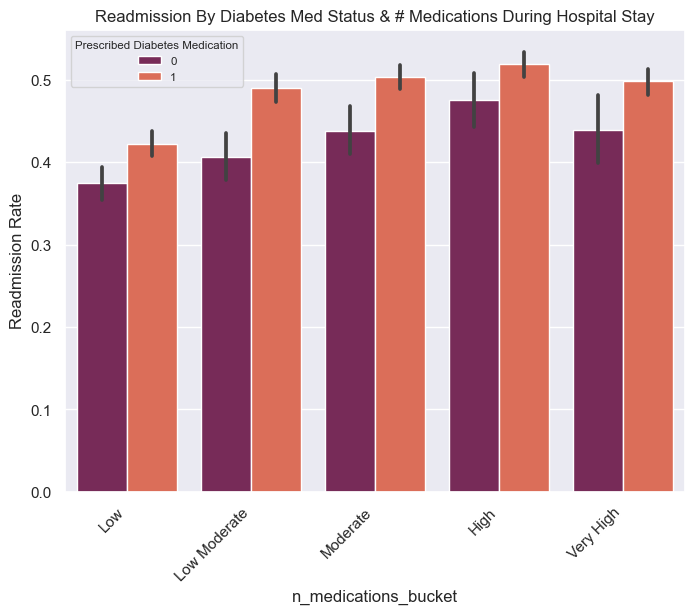

In [ ]:
# of Inpatient visits vs readmissions
cols = {
        'n_inpatient_bucket':'# of Inpatient Visits Previous Year',
        "n_outpatient_bucket":'# Outpatient Visits Previous Year',
        "n_emergency_bucket":'# ER Visits Previous Year',
        "n_procedures":'Procedures During Hospital Stay',
        "n_lab_procedures_bucket":'Labs Performed During Hospital Stay',
        "n_medications_bucket":'# Medications During Hospital Stay'
        }
df_chart = df_all.sort_values('age')

for i in cols.keys():
    #df_chart.head()
    chart = sns.barplot(data=df_chart,x=i,y="readmitted",hue='diabetes_med',palette = 'rocket',errorbar=('ci', 95))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    #chart.set(ylim=(0.3, 1.2))
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper left',title='Prescribed Diabetes Medication',fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Readmission Rate')
    plt.title("Readmission By Diabetes Med Status & "+cols[i])
    plt.show()


In [ ]:
from scipy.stats import ttest_ind

for i in df_all['age'].sort_values().unique(): #Age groupings
    #define samples
    nonDiabetics = df_all[(df_all['Diabetes_ind']==0) & (df_all['age'] == i)]
    diabetics = df_all[(df_all['Diabetes_ind']==1) & (df_all['age'] == i)]

    print('T-test results in group: ',i)
    #perform independent two sample t-test
    print('Non-Diabetics Avg Readmittance: ',"{:.2f}%".format(np.mean(nonDiabetics['readmitted'])*100))
    print('Diabetics Avg Readmittance: ',"{:.2f}%".format(np.mean(diabetics['readmitted'])*100))
    print("T-Statistic {:.2f}:".format(ttest_ind(nonDiabetics['readmitted'], diabetics['readmitted']).statistic))
    print("P-Value {:.2f}%:".format(ttest_ind(nonDiabetics['readmitted'], diabetics['readmitted']).pvalue*100))
    print('')

T-test results in group:  (40-50)
Non-Diabetics Avg Readmittance:  43.53%
Diabetics Avg Readmittance:  45.40%
T-Statistic -0.94:
P-Value 34.52%:

T-test results in group:  (50-60)
Non-Diabetics Avg Readmittance:  44.58%
Diabetics Avg Readmittance:  43.62%
T-Statistic 0.64:
P-Value 52.30%:

T-test results in group:  (60-70)
Non-Diabetics Avg Readmittance:  47.69%
Diabetics Avg Readmittance:  45.31%
T-Statistic 1.75:
P-Value 7.97%:

T-test results in group:  (70-80)
Non-Diabetics Avg Readmittance:  49.00%
Diabetics Avg Readmittance:  48.33%
T-Statistic 0.52:
P-Value 60.54%:

T-test results in group:  (80-90)
Non-Diabetics Avg Readmittance:  48.70%
Diabetics Avg Readmittance:  52.20%
T-Statistic -2.04:
P-Value 4.10%:

T-test results in group:  (90-100)
Non-Diabetics Avg Readmittance:  41.73%
Diabetics Avg Readmittance:  43.41%
T-Statistic -0.40:
P-Value 68.98%:



In [ ]:
for i in df_all['age'].sort_values().unique(): #Age groupings
    #define samples
    noMeds = df_all[(df_all['diabetes_med']==0) & (df_all['age'] == i)]
    meds = df_all[(df_all['diabetes_med']==1) & (df_all['age'] == i)]

    print('T-test results in group: ',i)
    #perform independent two sample t-test
    print('No Diabetes Meds: ',"{:.2f}%".format(np.mean(noMeds['readmitted'])*100))
    print('Yes Diabetes Meds: ',"{:.2f}%".format(np.mean(meds['readmitted'])*100))
    print("T-Statistic {:.2f}:".format(ttest_ind(noMeds['readmitted'], meds['readmitted']).statistic))
    print("P-Value {:.2f}%:".format(ttest_ind(noMeds['readmitted'], meds['readmitted']).pvalue*100))
    print('')

T-test results in group:  (40-50)
No Diabetes Meds:  38.59%
Yes Diabetes Meds:  46.33%
T-Statistic -3.33:
P-Value 0.09%:

T-test results in group:  (50-60)
No Diabetes Meds:  40.19%
Yes Diabetes Meds:  45.25%
T-Statistic -2.80:
P-Value 0.52%:

T-test results in group:  (60-70)
No Diabetes Meds:  41.84%
Yes Diabetes Meds:  48.23%
T-Statistic -4.06:
P-Value 0.00%:

T-test results in group:  (70-80)
No Diabetes Meds:  42.31%
Yes Diabetes Meds:  50.77%
T-Statistic -5.94:
P-Value 0.00%:

T-test results in group:  (80-90)
No Diabetes Meds:  42.67%
Yes Diabetes Meds:  51.85%
T-Statistic -5.35:
P-Value 0.00%:

T-test results in group:  (90-100)
No Diabetes Meds:  37.44%
Yes Diabetes Meds:  44.07%
T-Statistic -1.67:
P-Value 9.50%:



In [ ]:
# Select columns for clustering
quantCols = df_all.select_dtypes(include=[int,float]).columns

# Create new DataFrame with clustering variables
df_features = df_all[quantCols]

df_features

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t,Diabetes_ind
0,8,72,1,18,2,0,0,0,1,0,0,0,3,0
1,3,34,2,13,0,0,0,0,1,0,0,0,3,0
2,5,45,0,18,0,0,0,1,1,1,0,0,1,0
3,2,36,0,12,1,0,0,1,1,1,0,0,3,1
4,1,42,0,7,0,0,0,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,0,0,1,0,1,4,0
24996,2,66,0,24,0,0,0,1,1,1,0,2,4,0
24997,5,12,0,6,0,1,0,0,0,1,1,0,3,0
24998,2,61,3,15,0,0,0,1,1,0,0,0,3,1


C:\Users\kpk16\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


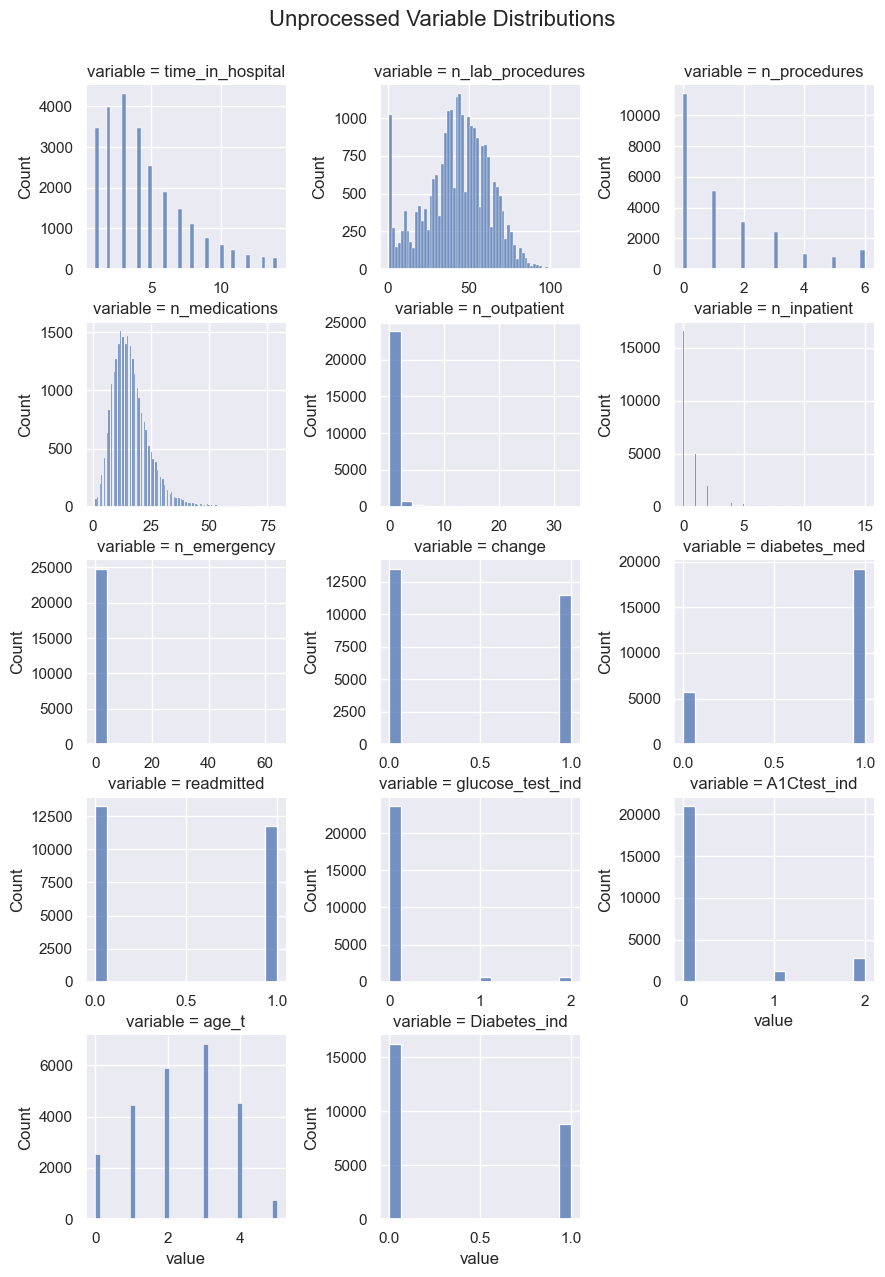

In [ ]:
# Plot the distributions of the selected variables
g = sns.FacetGrid(
    df_features.melt(),  # Reformat the DataFrame for plotting purposes
    col='variable',  # Split on the 'variable' column created by reformating
    sharey=False,  # Turn off shared y-axis
    sharex=False,  # Turn off shared x-axis
    col_wrap = 3
)
# Apply a histogram to the facet grid
g.map(sns.histplot, "value")
# Adjust the top of the plots to make room for the title
g.fig.subplots_adjust(top=0.8)
# Create a title
g.fig.suptitle("Unprocessed Variable Distributions", fontsize=16,y=.85)
plt.show()

<Axes: title={'center': 'Correlation Matrix of Model Features'}>

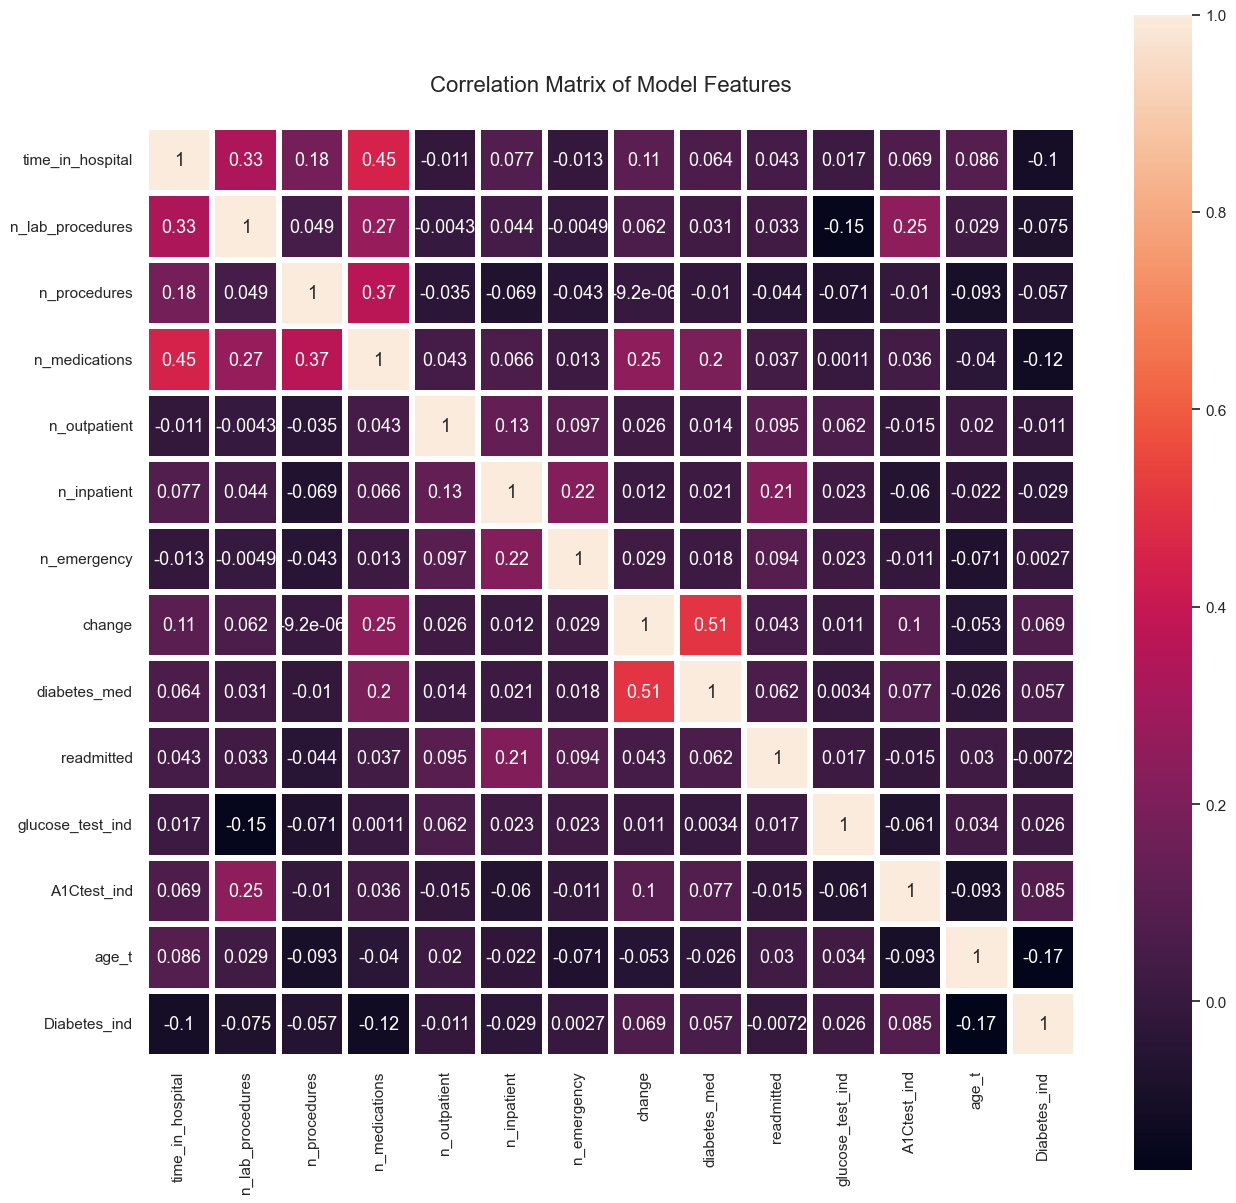

In [ ]:
def corr_matrix(dataframe, x, y, title):
    plt.subplots(figsize=(x, y))
    plt.title(title, fontsize=16,y=1.03)
    return sns.heatmap(dataframe.corr(),
            annot=True,
            linewidths=3,
            annot_kws={"fontsize":13},
            square=True,
           )

corr_matrix(df_features, 15, 15, 'Correlation Matrix of Model Features')

In [ ]:
#Transforming all columns that have noticeable skewness
transformCols = ['time_in_hospital','n_lab_procedures','n_procedures',
                 'n_medications','n_outpatient','n_inpatient','n_emergency']
all([pd.api.types.is_numeric_dtype(df_features[col]) for col in transformCols])

True

In [ ]:
df_log = df_features.copy()
# Perform a log transformation of the data to unskew the data
for feat in transformCols:
    #Add one to avoid INF values
    df_log[feat] = np.log(1+df_features[feat])

#Check how many INF readings we have in the data
np.isinf(df_log).sum()

time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
change              0
diabetes_med        0
readmitted          0
glucose_test_ind    0
A1Ctest_ind         0
age_t               0
Diabetes_ind        0
dtype: int64

In [ ]:
#Change INF values to mean for each feature
for i in transformCols:
    df_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_log[i] = df_log[i].fillna(df_log[i].mean())

np.isinf(df_log).sum()

time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
change              0
diabetes_med        0
readmitted          0
glucose_test_ind    0
A1Ctest_ind         0
age_t               0
Diabetes_ind        0
dtype: int64

In [ ]:
# Instantiate StandardScaler, PCA as scaler and pca respectively
scaler = StandardScaler()
pca = PCA()
# Create the pipeline using scaler and the pca object
pipeline = make_pipeline(scaler, pca)

# Fit and transform the model
df_normalized = pipeline.fit_transform(df_log)
df_normalized.shape

(25000, 14)

C:\Users\kpk16\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


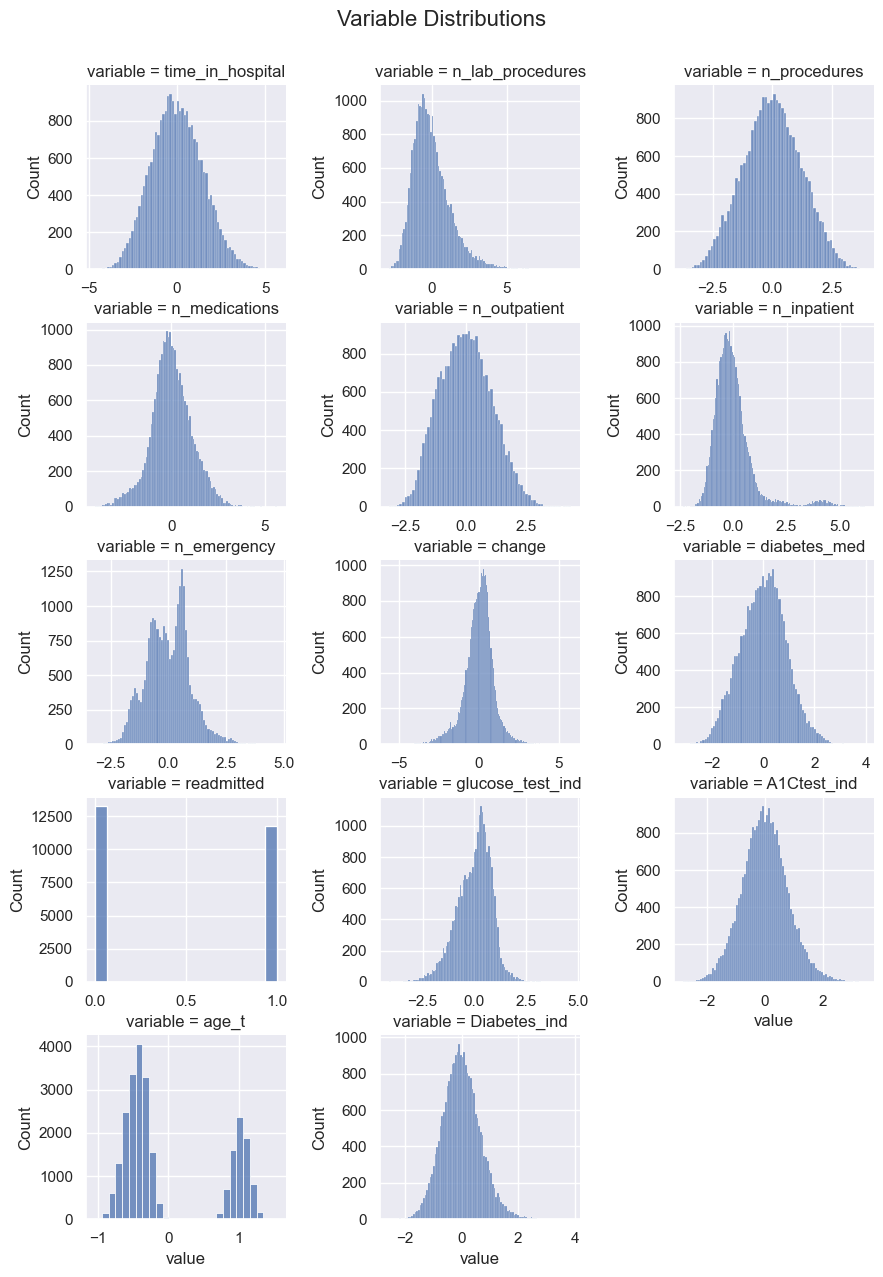

In [ ]:
#pandas DataFrame of the processed data
df_processed = pd.DataFrame(
    data=df_normalized, index=df_log.index, columns=df_log.columns
)

#Make sure our y variable (readmitted indicator) is not processed - Required for logistic regression
#Not sure this is legit given we are dropping in a non-processed target variable
df_processed['readmitted'] = df_features['readmitted']

# Plot the distributions of the selected variables
g = sns.FacetGrid(df_processed.melt(), 
                  col="variable", 
                  col_wrap = 3, 
                  sharey=False, 
                  sharex=False
                 )
g.map(sns.histplot, "value")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Variable Distributions", fontsize=16,y=.85)
plt.show()

<Axes: title={'center': 'Correlation Matrix of Model Features'}>

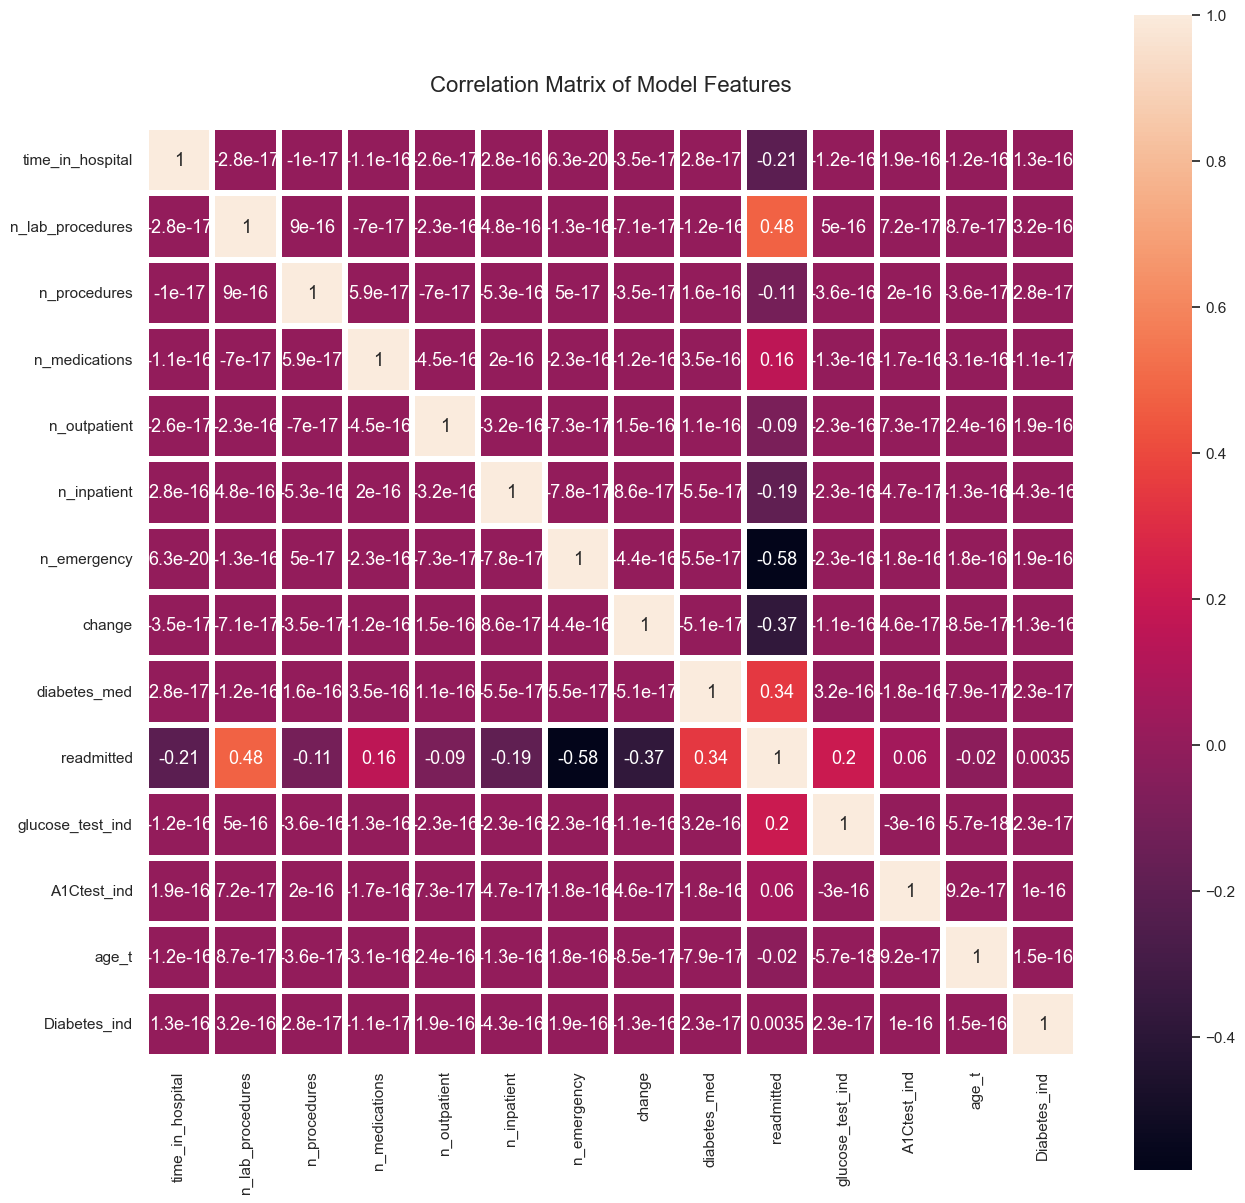

In [ ]:
corr_matrix(df_processed, 15, 15, 'Correlation Matrix of Model Features')

C:\Users\kpk16\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.01, 'Preprocessed Variable Distributions')

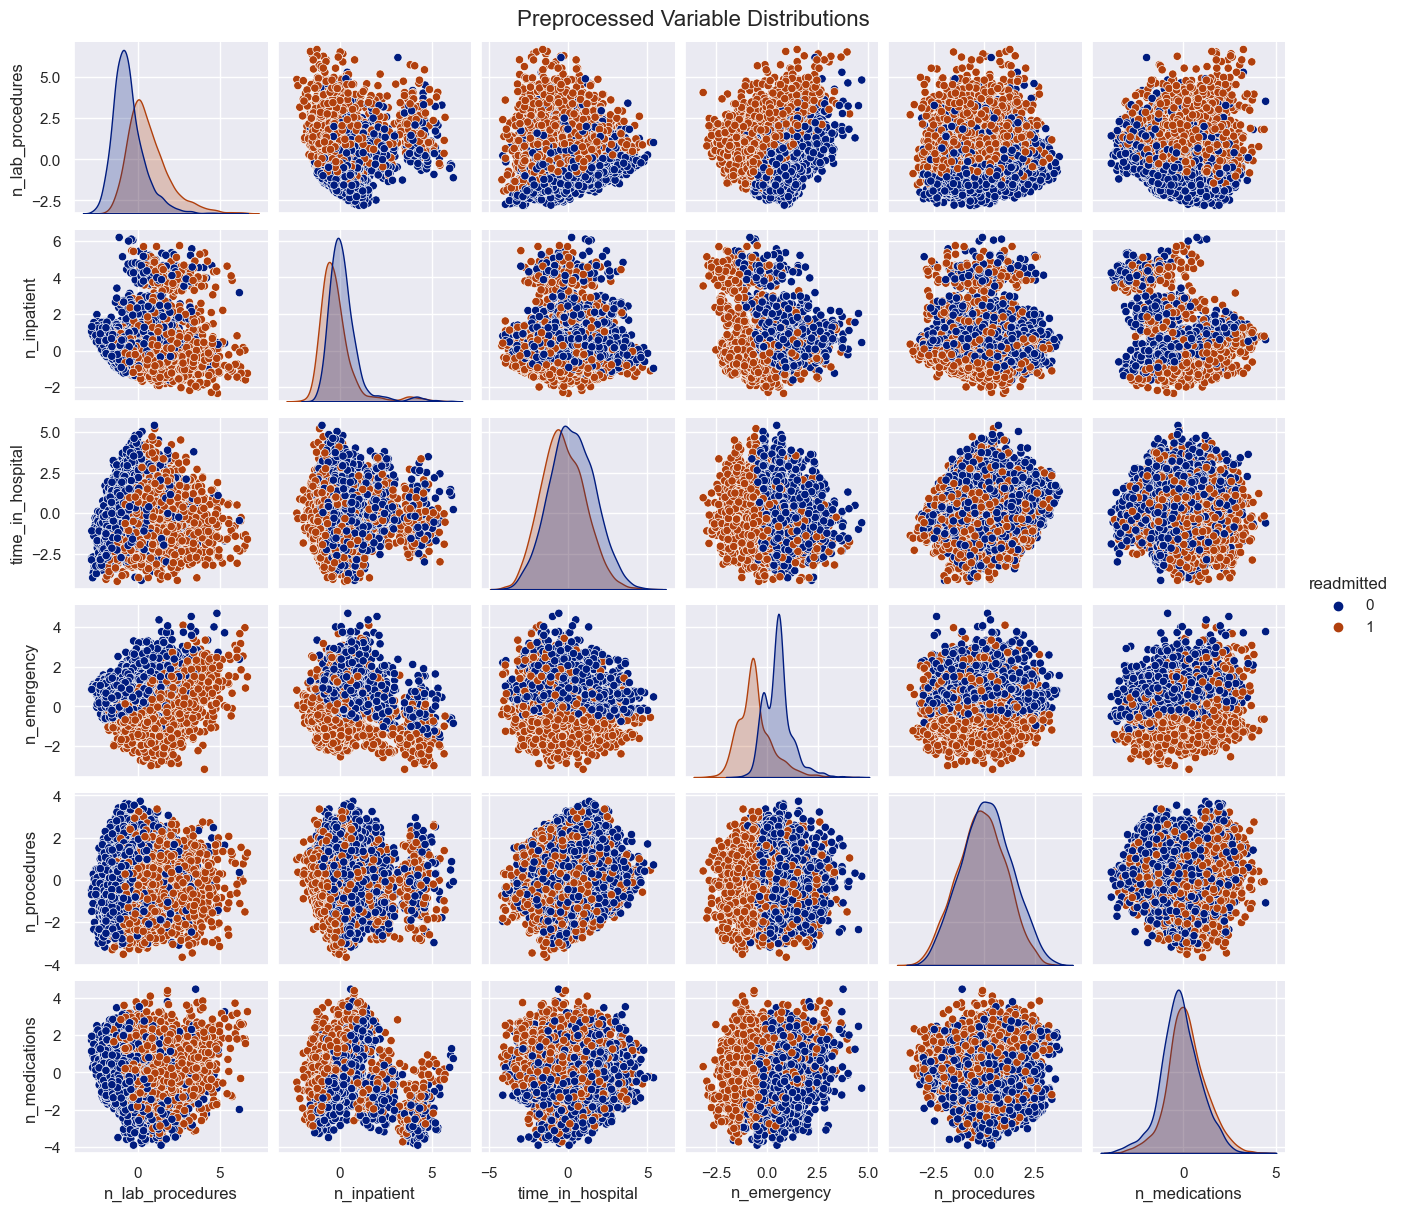

In [ ]:
g = sns.pairplot(data=df_processed.sample(10000), 
#df_processed should show no associations between features as those have been decomposed via PCA
             vars = ['n_lab_procedures', 'n_inpatient', 'time_in_hospital', 
                     'n_emergency', 'n_procedures', 'n_medications'],  
             kind="scatter", # kind of plots for each pair {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             diag_kind="kde",   # kind of plots on the diagonal {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             hue="readmitted",
             height=2,
             aspect=1.1,
             palette="dark"
             )
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16, y=1.01)

In [ ]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_processed.drop(columns=['readmitted'],axis=1)  # Specify at least one column as a feature
y = df_processed["readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.275, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18124, 13), (6876, 13), (18124,), (6876,))

In [ ]:
y_train

15318    1
19189    0
8849     0
20370    0
22174    1
        ..
15377    0
21602    0
17730    0
15725    1
19966    0
Name: readmitted, Length: 18124, dtype: int64

In [ ]:
# running a random forest instance 
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
#{'n_estimators': 97, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

In [ ]:
y_pred = rf.predict(X_test)
print('Training Set:', rf.score(X_train,y_train))
print('Test Set:', rf.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

joblib.dump(rf, 'random_forest_model.joblib')

Training Set: 1.0
Test Set: 0.9984002326934264
Accuracy: 99.84%
Precision: 99.75%
Recall: 99.91%
Area Under the Curve: 99.84%


['random_forest_model.joblib']

In [ ]:
# CROSS VALIDATION
scores = cross_val_score(rf, X_test, y_test, error_score="raise", cv=5, verbose=True)
scores


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.6s finished


array([0.99636628, 0.99490909, 0.99418182, 0.99854545, 0.99927273])

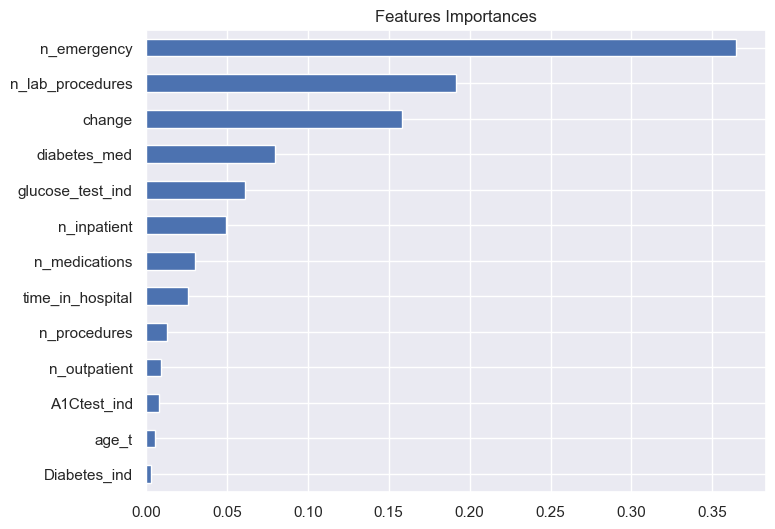

In [ ]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 15))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a RandomForestRegressor
rf = RandomForestClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with rf and the parameter grid
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=1,  # The higher this is, the more messages are outputed
    scoring="accuracy",  # Metric to evaluate performance
    random_state=123
)

# Train the model on the training set
rf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 121, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 13, 'ccp_alpha': 0}
Best performance:  0.9979033356290586


In [ ]:
# KNN CLASSIFIER 
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_neighbors": 20
}

# Create a logistic regression classifier object with the parameters above
knn1 = KNeighborsClassifier(**params)

# Train the classifer on the train set
knn1 = knn1.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = knn1.predict(X_test)
print('Training Set:', knn1.score(X_train,y_train))
print('Test Set:', knn1.score(X_test,y_test))


Training Set: 0.9990068417567866
Test Set: 0.9989819662594531


In [ ]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Accuracy: 99.90%
Precision: 99.84%
Recall: 99.94%
Area Under the Curve: 99.90%


In [ ]:
scores = cross_val_score(knn1, X_test, y_test, error_score="raise", cv=5, verbose=True)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


array([0.99563953, 0.99854545, 0.99709091, 0.99781818, 0.99636364])

In [ ]:
#Dimensionality Reduction
#Doing dimensionality reduction so that logit model doesn't reach perfect separation

dropCols = ['n_medications', 
            'n_procedures', 
            'time_in_hospital', 
            #'n_inpatient', 
            #'n_lab_procedures',
            'n_emergency',
            'n_outpatient', 
            'glucose_test_ind', 
            'A1Ctest_ind']

df_reduced = df_processed.copy()

for i in dropCols:
    df_reduced.drop(columns = [i], axis=1, inplace=True)

df_reduced


,n_lab_procedures,n_inpatient,change,diabetes_med,readmitted,age_t,Diabetes_ind
0,-0.321006,0.624004,-1.084182,-0.992298,0,1.191179,0.514083
1,-1.123283,-0.425072,0.187277,0.032259,0,0.957996,0.209736
2,-0.022460,-0.659701,0.154670,0.954961,1,-0.301107,-0.078244
3,1.071599,-0.154332,-1.511159,-0.882269,1,-0.424868,-0.220454
4,-0.387288,-0.612113,0.563049,0.401502,0,0.925900,0.099732
...,...,...,...,...,...,...,...
24995,-1.316886,0.801261,-0.640709,0.387048,1,-0.437455,-0.667067
24996,-0.457455,-0.063196,-0.928451,1.581372,1,-0.454362,-1.447173
24997,1.443011,1.694645,0.509614,1.336231,1,-0.681927,0.744099
24998,-1.134837,-0.149590,-0.044106,-1.318902,0,-0.507171,0.050998


In [ ]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_reduced.drop(columns=['readmitted'],axis=1)  # Specify at least one column as a feature
y = df_reduced["readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18750, 6), (6250, 6), (18750,), (6250,))

In [ ]:
# LOGISTIC REGRESSION
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    #"C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123,
}

# Create a logistic regression classifier object with the parameters above
clf = LogisticRegression(**params)

# Train the classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)
df_coef = pd.DataFrame(data=clf.coef_[0])

df_coef = df_coef.set_index(np.array(clf.feature_names_in_))
df_coef.rename(columns={0: 'coef'},inplace=True)
df_coef.sort_values('coef')


,coef
change,-1.803410
n_inpatient,-0.729650
age_t,-0.100714
Diabetes_ind,0.032104
diabetes_med,1.531563
n_lab_procedures,1.633761


In [ ]:
print('Training Set:', clf.score(X_train,y_train))
print('Test Set:', clf.score(X_test,y_test))

Training Set: 0.8668266666666666
Test Set: 0.86736


In [ ]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Accuracy: 86.74%
Precision: 85.57%
Recall: 86.25%
Area Under the Curve: 86.71%


Text(0.5, 33.249999999999986, 'Predicted label')

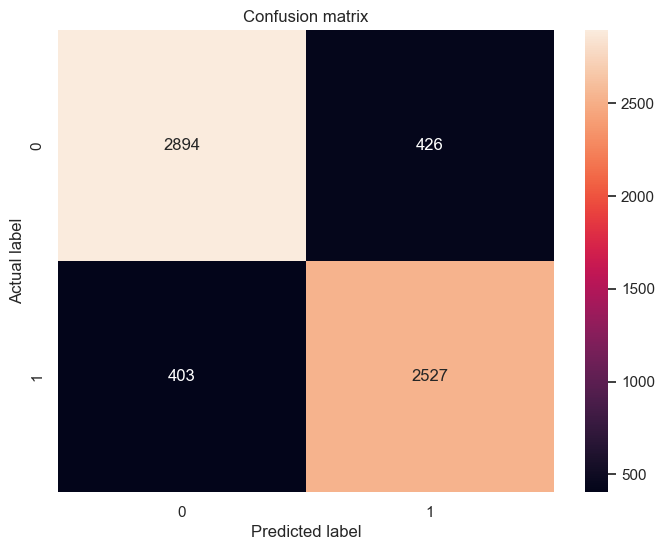

In [ ]:
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

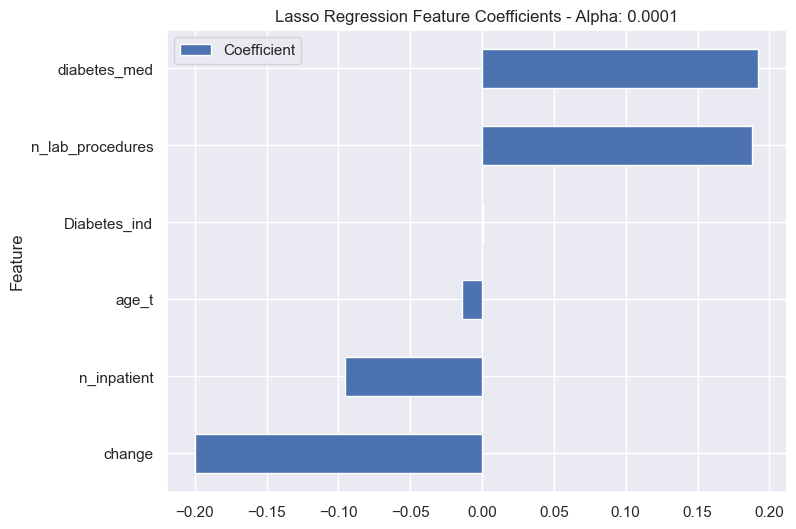

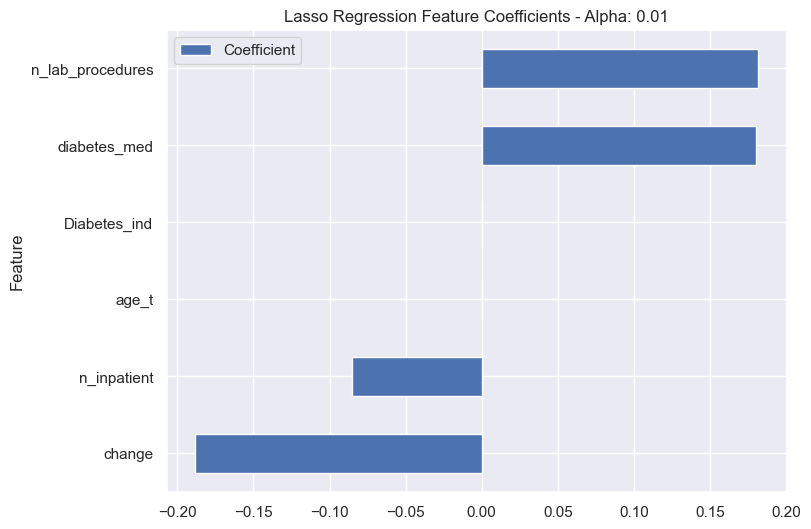

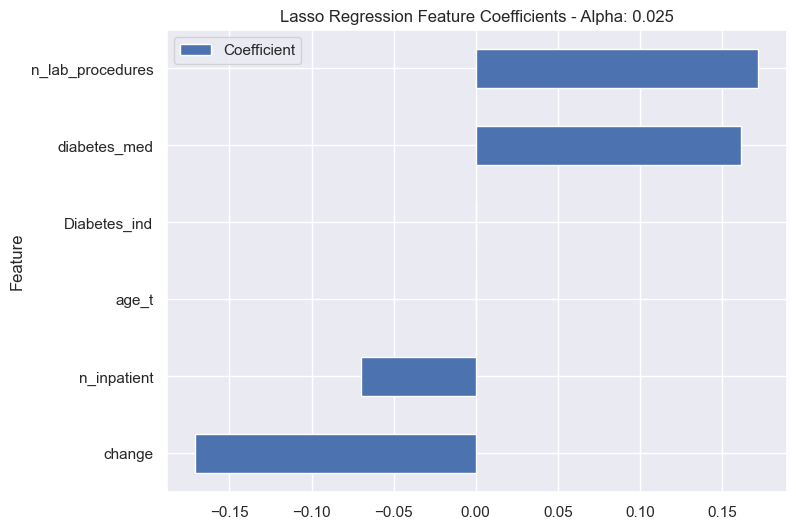

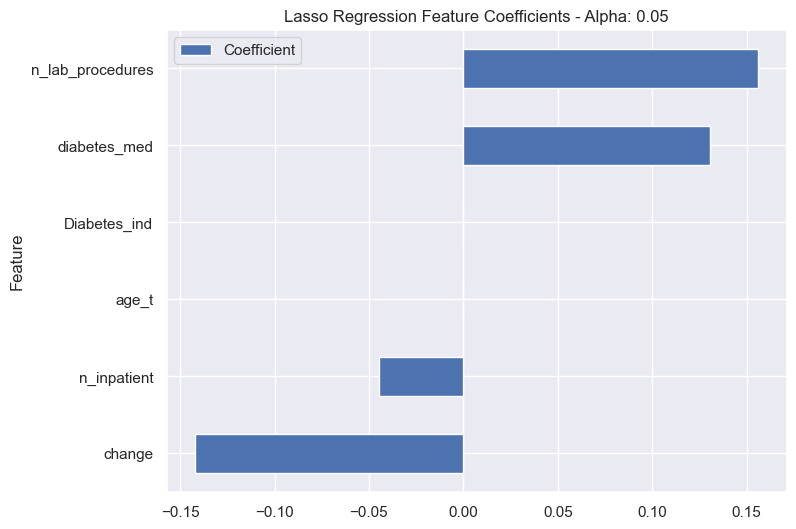

In [ ]:
# Lasso Regression & alpha parameter tuning to isolate significant features
scores = []
for alpha in [0.0001,0.01,0.025,0.05]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    
    scores.append(lasso.score(X_test, y_test))
    lasso_coef = lasso.coef_
    df_plot = pd.DataFrame(list(zip(lasso_coef,lasso.feature_names_in_))).set_index(1).sort_values(0).reset_index()
    df_plot.rename(columns={0: 'Coefficient',1:'Feature'},inplace=True)
    df_plot.plot.barh(x='Feature',y='Coefficient',title='Lasso Regression Feature Coefficients - Alpha: {alpha}'.format(alpha=alpha))

In [ ]:
# Model Testing with LazyPredict
%pip install lazypredict
%pip install optuna

In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.metrics import cohen_kappa_score

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=cohen_kappa_score,
                     predictions=False,
                     random_state=42,
                     classifiers = "all"
                     )

models_class, predictions_class = clf.fit(X_train , X_test , y_train , y_test)
models_class.sort_values(by='Accuracy', ascending=False,)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [03:28<00:03,  3.74s/it]

[LightGBM] [Info] Number of positive: 8824, number of negative: 9926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 18750, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470613 -> initscore=-0.117682
[LightGBM] [Info] Start training from score -0.117682


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [03:29<00:00,  7.22s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,cohen_kappa_score,Time Taken
Model,,,,,,
ExtraTreesClassifier,0.93,0.94,0.94,0.93,0.87,2.08
RandomForestClassifier,0.93,0.93,0.93,0.93,0.86,10.68
LGBMClassifier,0.93,0.93,0.93,0.93,0.85,0.65
XGBClassifier,0.93,0.93,0.93,0.93,0.85,2.19
KNeighborsClassifier,0.92,0.92,0.92,0.92,0.84,0.57
BaggingClassifier,0.92,0.92,0.92,0.92,0.84,3.00
SVC,0.92,0.92,0.92,0.92,0.84,8.28
LabelPropagation,0.92,0.92,0.92,0.92,0.83,51.80
LabelSpreading,0.92,0.92,0.92,0.92,0.83,102.63
